# Aggregate Random Forest Analysis
Since random forests are randomized by nature of the algorithm, we will be applying a random forest several times (100) to try and determine the actual importance of individual features

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score
import sklearn

In [2]:
africa = pd.read_csv('africa-ML-54_21-03-11.csv')
africa = africa.dropna('columns')
africa=sklearn.utils.shuffle(africa)
labels = africa['sahoStatusEHA']
data = africa.drop(columns=['dayNum', 'tempDiffS', 'tempDiff66','sahoStatusEHA', 'country', 'christCountry', 'cumCasesLag1', 'cumCasesLag1P100KC', 'cumDeathsLag1', 'ebolaCasesN', 'gdpPerCap', 'medDocsN']).select_dtypes(['number'])
#data = data.sample()
train_num = 40


training_data = data[0:train_num]
training_labels = list(labels[0:train_num])

test_data = data[train_num:]
test_labels = list(labels[train_num:])

<ipython-input-2-392a5e4d8ddf>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  africa = africa.dropna('columns')


<ipython-input-3-be63ba28eed5>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.hist(np.array([training_labels, test_labels]) , 3,  histtype='bar', label=['training', 'test'])


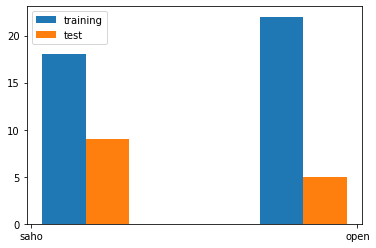

In [3]:
plt.hist(np.array([training_labels, test_labels]) , 3,  histtype='bar', label=['training', 'test'])
plt.legend()

In [4]:
feature_importance = {}
for i in np.arange(2000):
    rf = RandomForestClassifier(n_estimators = 50, max_depth=30, criterion='entropy')
    rf.fit(training_data, training_labels)
    predictions = rf.predict(test_data)
    # Collect the most important features
    importance = pd.DataFrame({'feature': training_data.columns, 'importance': np.round(rf.feature_importances_, 3)})
    importance.sort_values('importance', ascending=False, inplace=True)
    importance = importance[:10]
    # Assign values to dictionary
    for imp in importance.values:
        if imp[0] not in feature_importance.keys():
            # If the key is not already there then add it
            feature_importance[imp[0]] = [imp[1]]
        else:
            feature_importance[imp[0]].append(imp[1])

In [5]:
feature_importance_df = pd.DataFrame.from_dict(feature_importance, orient='index')
final_features = feature_importance_df.agg(['mean', 'std', 'sem'], axis=1).sort_values('mean', ascending=False)[:20]
final_features['95-conf'] = 1.96*final_features['sem']
final_features['99-conf'] = 3*final_features['sem']

#print(final_features)

In [6]:
final_features

,mean,std,sem,95-conf,99-conf
tempDiffSunfitted,0.070362,0.019411,0.000435,0.000852,0.001305
prevAdopt,0.042084,0.012168,0.000293,0.000574,0.000878
casesMD,0.040689,0.011396,0.000277,0.000543,0.000831
nonComDis,0.039124,0.010684,0.000264,0.000517,0.000791
ciaArea,0.035369,0.009131,0.000248,0.000485,0.000743
urbanPop,0.033579,0.007814,0.000233,0.000457,0.000700
envMort,0.031370,0.006599,0.000226,0.000443,0.000678
WespHvyIndbt,0.031212,0.007179,0.000287,0.000563,0.000862
muslimPct,0.031171,0.006708,0.000257,0.000505,0.000772
inflation,0.030972,0.006789,0.000238,0.000467,0.000714


Text(0, 0.5, 'Importance of Feature (%)')

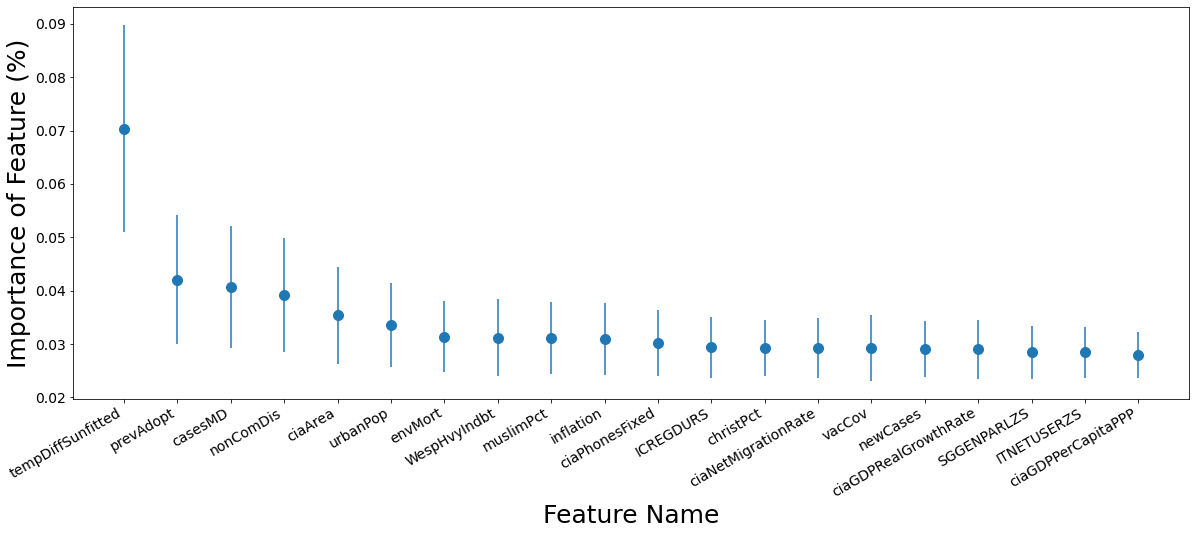

In [7]:
#with plt.xkcd():
fig = plt.figure(figsize=(20,8))
plt.errorbar(final_features.index, 'mean', yerr='std', data=final_features, fmt='o', ms=10)
#plt.xticks(rotation=-60)
fig.autofmt_xdate()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature Name', fontsize=25)
plt.ylabel('Importance of Feature (%)', fontsize=25)
#plt.savefig('Feature-Importance.png')

In [8]:
feature_importance.keys()

dict_keys(['tempDiffSunfitted', 'vacCov', 'casesMD', 'ICREGDURS', 'prevAdopt', 'population', 'newCases', 'urbanPop', 'ciaMedianAge', 'ciaNetMigrationRate', 'nonComDis', 'envMort', 'ciaPhonesFixed', 'gdpPerCapLn', 'inflation', 'ciaArea', 'christPct', 'firstDeath', 'ciaReservesForeignExchangeGold', 'muslimPct', 'ciaPublicDebt', 'ENATMPM25MCM3', 'ciaGDPRealGrowthRate', 'ciaDeathRate', 'ITNETUSERZS', 'ciaPhonesMobile', 'popDen', 'ciaGDPPerCapitaPPP', 'WespHvyIndbt', 'ciaElectyProduction', 'ciaRefdPetrolProdsConsump', 'ciaInfantMortalityRate', 'IPJRNARTCSC', 'ITCELSETSP2', 'ciaCarbDioxEmsCons', 'ciaInternetUsers', 'nNeighbors', 'ciaElectyHydroPlants', 'govEffInd', 'SGGENPARLZS', 'ciaPopulation', 'ciaPopGrowRate', 'ciaLifeExpectancyAtBirth', 'ciaRefPetrolProdsImports', 'matMort', 'ciaElectyConsump', 'geoDiff', 'ciaElectyFossilFuels', 'ciaInflationRateConsPrices', 'ciaBudgetSurplusDeficit', 'SHDYNMORT', 'ciaElectyOthRenew', 'ciaTaxesOtherRevenues', 'ciaElectyInstallGenCap', 'ciaObesityAdultPr

In [9]:
final_used_features = list(feature_importance.keys())[:10]

rf = RandomForestClassifier(n_estimators = 50, max_depth=30, criterion='entropy')
rf.fit(training_data[final_used_features], training_labels)


predictions = rf.predict(test_data[final_used_features])
print(classification_report(test_labels, predictions, labels=list(set(test_labels))))

              precision    recall  f1-score   support

        open       0.29      0.40      0.33         5
        saho       0.57      0.44      0.50         9

    accuracy                           0.43        14
   macro avg       0.43      0.42      0.42        14
weighted avg       0.47      0.43      0.44        14

